In [147]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [148]:
df_houseprice=pd.read_csv("/Users/frankzhong/Downloads/ECO225/ECO225PROJECT/Data/housing.csv")
df_houseprice

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


### Check for missing values

In [149]:
df_houseprice.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [150]:
df_houseprice[df_houseprice.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,161900,NEAR BAY
341,-122.17,37.75,38,992,NaN,732,259,1.6196,85100,NEAR BAY
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,173400,NEAR BAY
563,-122.24,37.75,45,891,NaN,384,146,4.9489,247100,NEAR BAY
696,-122.10,37.69,41,746,NaN,387,161,3.9063,178400,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,220500,NEAR OCEAN
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,167400,NEAR OCEAN
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,410700,<1H OCEAN
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,258100,<1H OCEAN


In [151]:
print(df_houseprice['ocean_proximity'].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


### Impute the missing values using the average based on location of the house with respect to ocean


In [152]:
#Create a new dataframe with only columns of 'total_bedrooms' and 'ocean_proximity'
new_house = df_houseprice[['total_bedrooms', 'ocean_proximity']]
new_house

,total_bedrooms,ocean_proximity
0,129.0,NEAR BAY
1,1106.0,NEAR BAY
2,190.0,NEAR BAY
3,235.0,NEAR BAY
4,280.0,NEAR BAY
...,...,...
20635,374.0,INLAND
20636,150.0,INLAND
20637,485.0,INLAND
20638,409.0,INLAND


In [153]:
#Computed the average total bedrooms within a block based on location of the house with respect to ocean
result = new_house.groupby('ocean_proximity').mean()
result

,total_bedrooms
ocean_proximity,
<1H OCEAN,546.539185
INLAND,533.881619
ISLAND,420.400000
NEAR BAY,514.182819
NEAR OCEAN,538.615677


In [154]:
#Imputed the average to the new_house dataframe
for i in range(len(new_house)):
    if pd.isnull(new_house['total_bedrooms'][i]):
        new_house['total_bedrooms'][i] = result['total_bedrooms'][new_house['ocean_proximity'][i]]

/var/folders/hv/0dhczwp15297zx47dnz76l040000gn/T/ipykernel_34817/898462846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_house['total_bedrooms'][i] = result['total_bedrooms'][new_house['ocean_proximity'][i]]


In [155]:
new_house.isnull().sum()

total_bedrooms     0
ocean_proximity    0
dtype: int64

In [156]:
#Merge the imputed column to the original dataframe
df_houseprice['total_bedrooms'] = new_house['total_bedrooms']
df_houseprice.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Summary Statistic

In [157]:
df_houseprice.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.880892,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.267735,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Keeping columns "housing_median_age", "median_income", and "median_house_value"

In [158]:
df_predict_price = df_houseprice.drop(columns=['longitude', 'latitude','total_rooms','total_bedrooms','population','households','ocean_proximity'])
df_predict_price

,housing_median_age,median_income,median_house_value
0,41,8.3252,452600
1,21,8.3014,358500
2,52,7.2574,352100
3,52,5.6431,341300
4,52,3.8462,342200
...,...,...,...
20635,25,1.5603,78100
20636,18,2.5568,77100
20637,17,1.7000,92300
20638,18,1.8672,84700


### Remove Outliers

In [259]:
#Function for outliers
def check_outliers(df, threshold=3):
    mean = df.mean()
    std = df.std()
    z = (df - mean) / std
    outliers = df[(np.abs(z) > threshold).any(axis=1)]
    return outliers

In [260]:
#Standardize
standardized = (df_predict_price - df_predict_price.mean()) / df_predict_price.std()

print(standardized)
standardized.max()

       housing_median_age  median_income  median_house_value
0                0.982119       2.344709            2.129580
1               -0.607004       2.332181            1.314124
2                1.856137       1.782656            1.258663
3                1.856137       0.932945            1.165072
4                1.856137      -0.012881            1.172871
...                   ...            ...                 ...
20635           -0.289180      -1.216099           -1.115777
20636           -0.845373      -0.691576           -1.124443
20637           -0.924829      -1.142566           -0.992722
20638           -0.845373      -1.054557           -1.058583
20639           -1.004285      -0.780111           -1.017853

[20640 rows x 3 columns]


housing_median_age    1.856137
median_income         5.858144
median_house_value    2.540349
dtype: float64

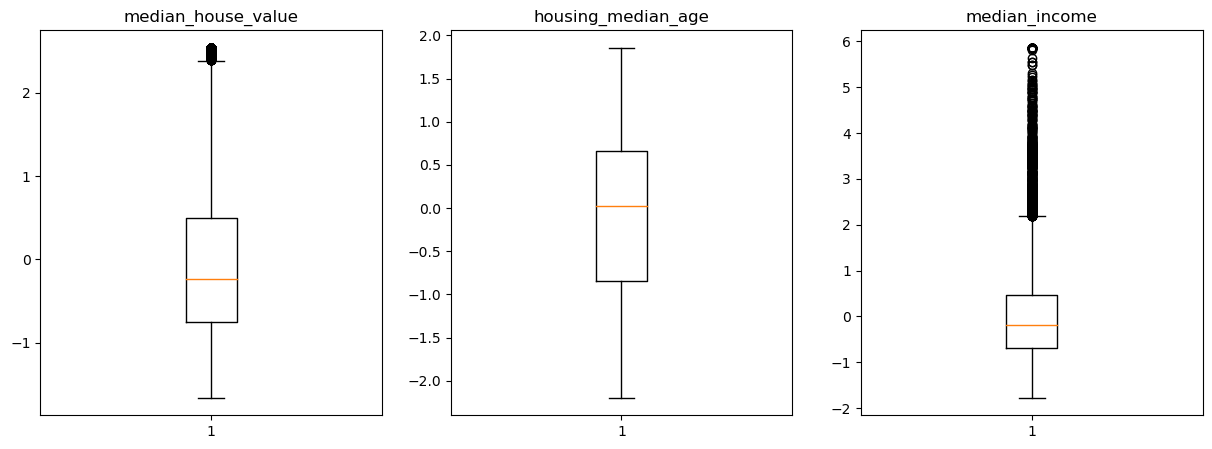

In [261]:
#Visualize the three boxplots

fig, ax = plt.subplots(1, 3, figsize=(15, 5))


ax[0].boxplot(standardized['median_house_value'])
ax[0].set_title('median_house_value')


ax[1].boxplot(standardized['housing_median_age'])
ax[1].set_title('housing_median_age')


ax[2].boxplot(standardized['median_income'])
ax[2].set_title('median_income')


plt.show()

In [262]:
outliers = check_outliers(standardized)
print(outliers)
outliers.max()

       housing_median_age  median_income  median_house_value
131             -0.845373       4.069344            1.609629
409              1.856137       3.269690            1.647759
510              0.823207       4.205463            2.540349
511              1.061575       5.068017            2.540349
512              1.856137       4.391533            2.540349
...                   ...            ...                 ...
20376           -1.004285       3.363857            1.767348
20380           -1.004285       3.310326            2.540349
20389           -0.209723       3.257584            2.540349
20426           -1.401566       3.251110            2.540349
20436           -1.481022       4.564286            2.540349

[345 rows x 3 columns]


housing_median_age    1.856137
median_income         5.858144
median_house_value    2.540349
dtype: float64

In [281]:
df_no_outliers = standardized.drop(outliers.index, axis=0)
df_no_outliers.max()

housing_median_age    1.856137
median_income         2.992612
median_house_value    2.540349
dtype: float64

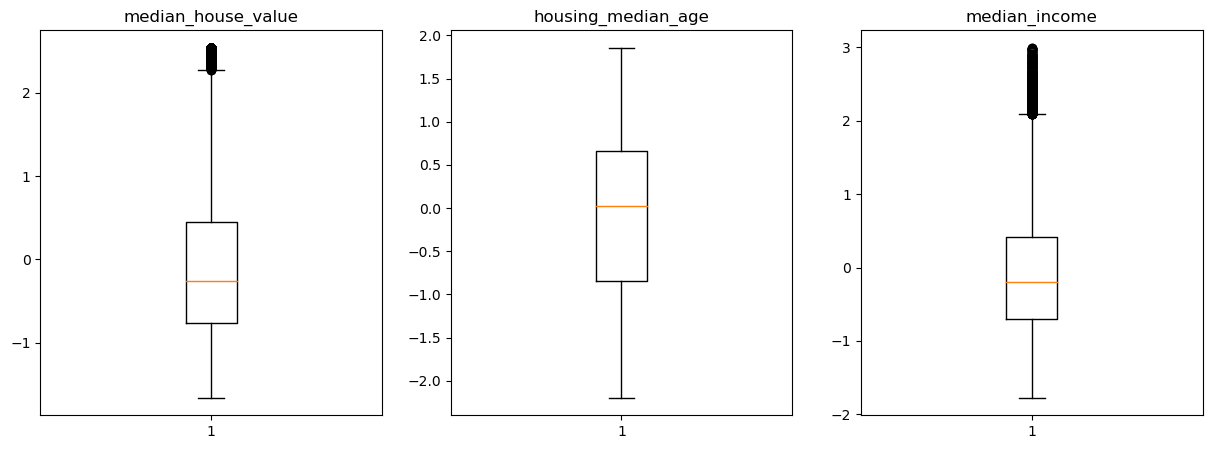

In [264]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))


ax[0].boxplot(df_no_outliers['median_house_value'])
ax[0].set_title('median_house_value')


ax[1].boxplot(df_no_outliers['housing_median_age'])
ax[1].set_title('housing_median_age')


ax[2].boxplot(df_no_outliers['median_income'])
ax[2].set_title('median_income')


plt.show()

In [282]:
#noticed the outliers are not being removed properly

q1 = df_no_outliers.quantile(0.25)
q3 = df_no_outliers.quantile(0.75)

iqr = q3 - q1

o_low = q1 - 1.5*iqr
o_high = q3 + 1.5*iqr

o_high['median_income']


2.0901061186875847

In [266]:
df_no_outliers.describe()

,housing_median_age,median_income,median_house_value
count,20295.000000,20295.000000,20295.000000
mean,-0.000311,-0.069443,-0.040320
std,0.997555,0.844773,0.956611
min,-2.196127,-1.774256,-1.662601
25%,-0.845373,-0.694760,-0.763078
50%,0.028645,-0.191108,-0.254393
75%,0.664294,0.419186,0.453606
max,1.856137,2.992612,2.540349


In [267]:
(0.419186 - (-0.694760))*1.5 + 0.419186

2.090105

In [268]:
a = (df_no_outliers['median_house_value'] <= o_high['median_house_value']) & (df_no_outliers['median_house_value'] >= o_low['median_house_value'])
b = (df_no_outliers['housing_median_age'] <= o_high['housing_median_age']) & (df_no_outliers['housing_median_age'] >= o_low['housing_median_age'])
c = (df_no_outliers['median_income'] <= o_high['median_income']) & (df_no_outliers['median_income'] >= o_low['median_income'])

In [269]:
a = (df_no_outliers['median_house_value'] <= o_high['median_house_value']) & (df_no_outliers['median_house_value'] >= o_low['median_house_value'])
b = (df_no_outliers['housing_median_age'] <= o_high['housing_median_age']) & (df_no_outliers['housing_median_age'] >= o_low['housing_median_age'])
c = (df_no_outliers['median_income'] <= o_high['median_income']) & (df_no_outliers['median_income'] >= o_low['median_income'])

condition = a & b & c
df_no_outliers2 = df_no_outliers[condition]
df_no_outliers2.max()


housing_median_age    1.856137
median_income         2.088422
median_house_value    2.278632
dtype: float64

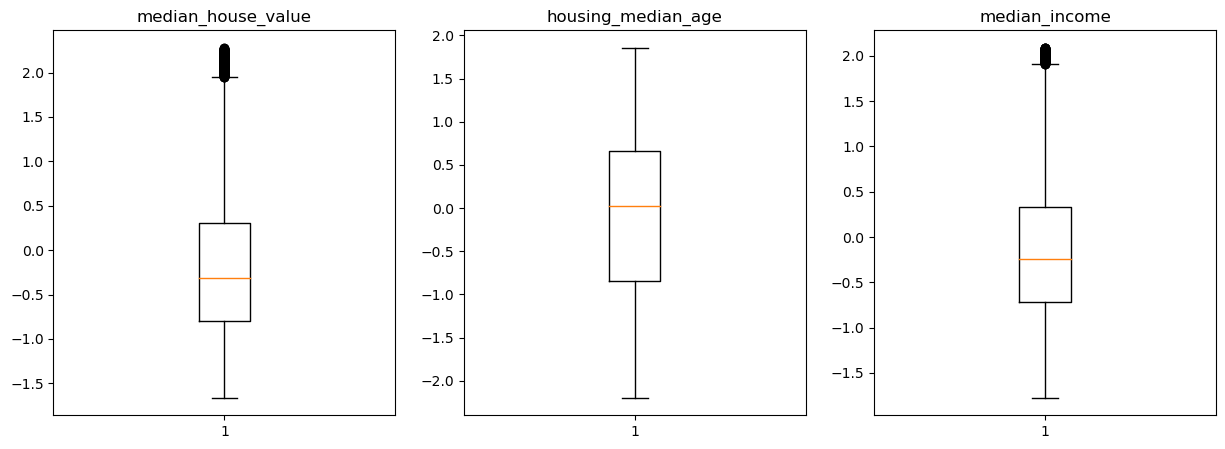

In [270]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))


ax[0].boxplot(df_no_outliers2['median_house_value'])
ax[0].set_title('median_house_value')


ax[1].boxplot(df_no_outliers2['housing_median_age'])
ax[1].set_title('housing_median_age')


ax[2].boxplot(df_no_outliers2['median_income'])
ax[2].set_title('median_income')


plt.show()

### 4) Plots

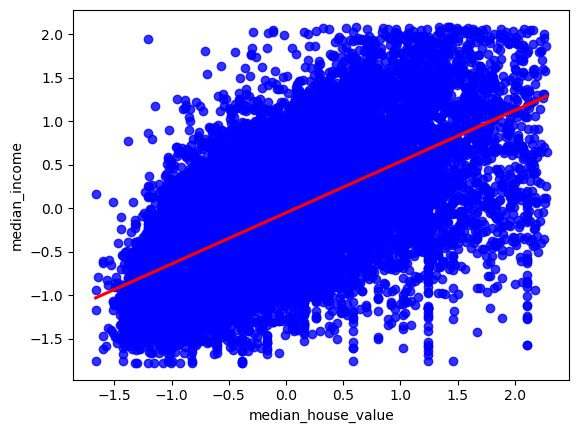

In [290]:
import seaborn as sns

sns.regplot(x=df_no_outliers2.median_house_value, y=df_no_outliers2.median_income, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})


plt.show()


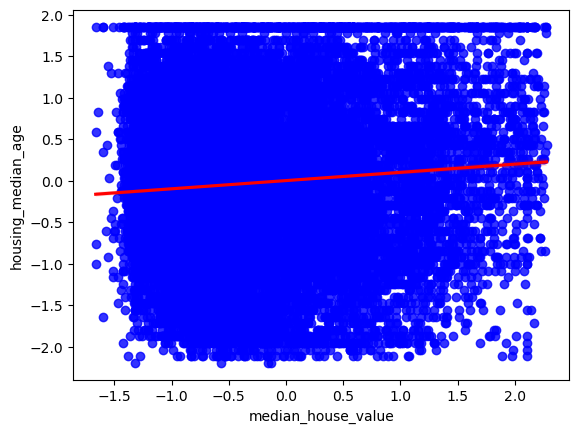

In [291]:
sns.regplot(x=df_no_outliers2.median_house_value, y=df_no_outliers2.housing_median_age, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})


plt.show()

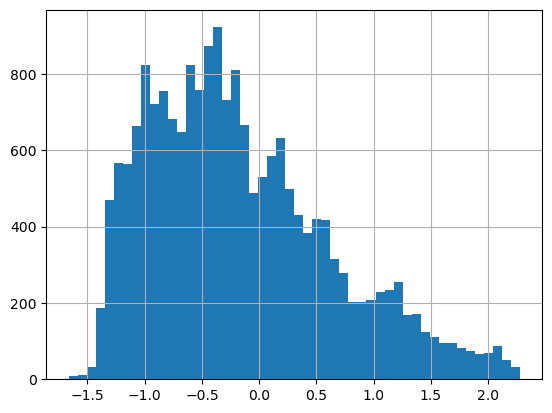

In [292]:
df_no_outliers2['median_house_value'].hist(bins=50)
plt.show()

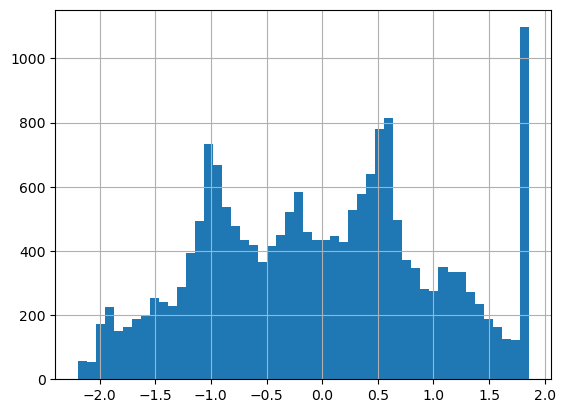

In [293]:
df_no_outliers2['housing_median_age'].hist(bins=50)
plt.show()

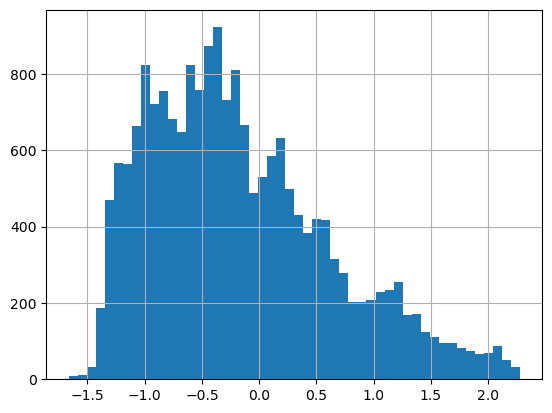

In [294]:
df_no_outliers2['median_house_value'].hist(bins=50)
plt.show()